In [1]:
##########_____Graph_Coloring_Data_Analysis_____##########

In [2]:
import networkx as nx
import matplotlib as plt
import numpy as np
import random

In [3]:
import itertools
from collections import defaultdict, deque

from networkx.utils import arbitrary_element, py_random_state

In [4]:
def RLFColoring(graph,colors = {}):
    #The list that we will return with order of nodes to be colored
    result = []
    count = 0
    
    #the first vertex colored is the vertex with the most neighbors.
    #graph.degree(node) returns an int of number of neighbors.
    high = -1
    topNode = None
    for node in graph.__iter__():
        
        if graph.degree(node) > high:
            count+=1
            topNode = node
            high = graph.degree(node)
    result.append(topNode)   
        
            
    while len(result) < graph.number_of_nodes(): 
        #the next node that is decided is
            #a) not currently adjacent to any vertex in result

        #dict of vertices adjacent to vertices in S
        adjdict = {}
        for node in result:
            adjdict.update(graph.__getitem__(node))
        #list of vertices not adjacent to any vertex in Result
        notadj = []
        for node in graph.__iter__():
            count+=1
            if (adjdict.get(node) is None) and (node not in result):
                notadj.append(node)
                
        #if not adj has none then we need to do something 
        if notadj == []:
            for node in graph.__iter__():
                count+=1
                if node not in result:
                    #print(node)
                    notadj.append(node)

            #b) has maximal number of neighbors adjacent to vertices in S
        pairings ={}
        for node in notadj:
            adjacents = graph.__getitem__(node)
            new_count = 0
            count+=1
            for adj in adjacents: 
                if adj in result:
                    new_count+= 1

            if pairings.get(count) is not None:
                a = graph.degree(pairings[new_count])-new_count
                b = graph.degree(node)-new_count
                if a < b:
                    pairings.update({new_count:node}) 
                 # else do nothing
            else:   
                pairings.update({new_count:node})   

        result.append(pairings[max(pairings)])
    #print(result)
        
    return result, count

In [5]:
def strategy_random_sequential(G, colors):
    count = 0
    nodes = list(G)
    #print(nodes)
    nodes = random.sample(nodes,len(nodes))
    #print(nodes)
    return nodes, count

In [6]:
def greedy_color(G, strategy):
    count = 0
    if len(G) == 0:
        return {}
    if not callable(strategy):
        raise nx.NetworkXError(
            "strategy must be callable or a valid string. " f"{strategy} not valid."
        )
    colors = {}
    nodes,count = strategy(G, colors)
    for u in nodes:
        # Set to keep track of colors of neighbours
        neighbour_colors = {colors[v] for v in G[u] if v in colors}
        # Find the first unused color.
        for color in itertools.count():
            count += 1
            if color not in neighbour_colors:
                count -= 1
                break
        # Assign the new color to the current node.
        colors[u] = color
    return colors, count

In [7]:
bot = nx.Graph()

bot.add_edge('a', 'f')
bot.add_edge('a', 'c')
bot.add_edge('a', 'd')
bot.add_edge('a', 'e')
bot.add_edge('f', 'b')
bot.add_edge('e', 'd')
bot.add_edge('c', 'd')


#nx.draw_networkx(bot)

In [8]:
greedy_color(bot, strategy_random_sequential)

({'a': 0, 'b': 0, 'f': 1, 'c': 1, 'e': 1, 'd': 2}, 5)

In [9]:
greedy_color(bot, strategy_random_sequential)[0]

{'b': 0, 'a': 0, 'd': 1, 'f': 1, 'c': 2, 'e': 2}

In [10]:
greedy_color(bot, RLFColoring)

({'a': 0, 'b': 0, 'f': 1, 'e': 1, 'd': 2, 'c': 1}, 71)

In [11]:
len(bot.edges())

7

In [12]:
#helper function of DSatur
def get_neighbor_colors(graph, node, color_map):
    neighbors = graph.neighbors(node)
    neighbor_colors = []
    count = 0
    for neigh in neighbors:
        
        if neigh in color_map:
            count+=1
            neighbor_colors.append(color_map[neigh])
    return list(set(neighbor_colors)), count

In [13]:
def DSatur(graph):
    #need a way to keep track of colors 
    color_dict = {}
    count = 0
    
    #need a while loop
    while len(color_dict) < len(graph.nodes()):
    
    #calc sat degrees
        count += [get_neighbor_colors(graph, node, color_dict)[1] for node in graph.nodes()][-1]
        all_color_list = { node: get_neighbor_colors(graph, node, color_dict)[0] for node in graph.nodes()}
        #print(all_color_list)
        #print(count)
        #sort uncolored nodes by sat degrees
        candidates = []
        for node in graph.nodes():
            if node not in color_dict:
                candidates.append(node)
        count+=(len(candidates))
        sorted_deg_map = sorted(candidates, key = lambda x: len(all_color_list[x]))
            
        #get node with highest sat degree
        node_toColor = sorted_deg_map[-1]
        #find the minimum allowed color a color the node that color 
        color = 0
        while color in all_color_list[node_toColor]:
            color += 1
            count+=1
        color_dict[node_toColor] = color
    #return the color map
    return color_dict, count

In [14]:
colors,count = DSatur(bot)
print(list(colors.values()))
print(count)

[0, 1, 0, 1, 2, 1]
30


In [15]:
list(bot.nodes)

['a', 'f', 'c', 'd', 'e', 'b']

In [16]:
graphs = []
B = nx.Graph()

B.add_nodes_from(["a", "b", "c"], bipartite=0)
B.add_nodes_from(["d","e", "f"], bipartite=1)

C = nx.complete_graph(9)

S = nx.star_graph(9, create_using=None)

graphs += [B, C, S]

print (graphs)

[<networkx.classes.graph.Graph object at 0x113e62250>, <networkx.classes.graph.Graph object at 0x113e70450>, <networkx.classes.graph.Graph object at 0x11418a7d0>]


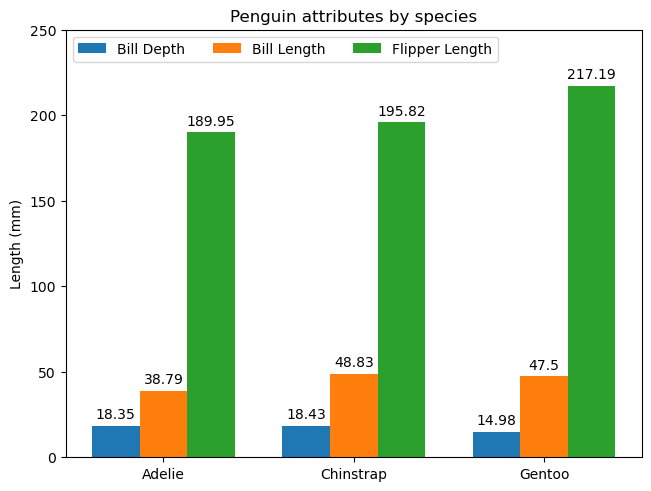

In [17]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': [18.35, 18.43, 14.98],
    'Bill Length': [38.79, 48.83, 47.50],
    'Flipper Length': [189.95, 195.82, 217.19],
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

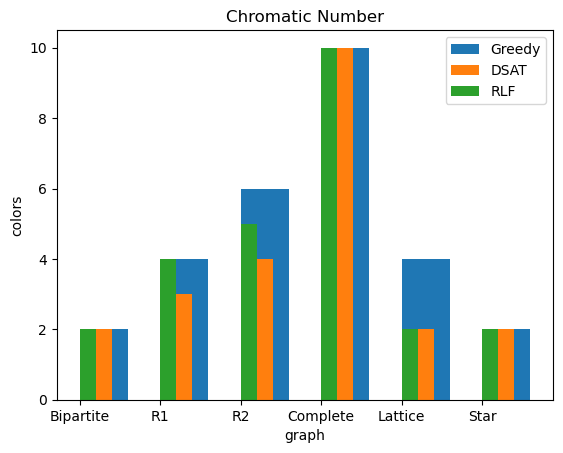

In [18]:
import matplotlib.pyplot as plt


B = (nx.algorithms.bipartite.gnmk_random_graph(10, 10, 90),"Bipartite")

C = (nx.complete_graph(10),"Complete")

S = (nx.star_graph(100, create_using=None),"Star")
R1 = (nx.gnm_random_graph(100,100),"R1")
R2 = (nx.gnm_random_graph(100,300), "R2")
L = (nx.grid_2d_graph(30,30),"Lattice")

graphs = [B[0], R1[0], R2[0], C[0], L[0], S[0]]
names = [B[1], R1[1], R2[1], C[1], L[1], S[1]]

x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Chromatic Number')

i = 0
for bot in graphs:
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (names[i])
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )
    i+=1
    
    
plt.bar(x_values, y_values_Greedy_rand, width=0.6, bottom=None, align='edge', label="Greedy")
plt.bar(x_values, y_values_DSatur, width=0.4, bottom=None, align ='edge', label="DSAT")
plt.bar(x_values, y_values_RLF, width=0.2, bottom=None, align ='edge', label="RLF")
'''
plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")
'''
leg = plt.legend(loc='best')

plt.show()

[10]
[10, 60]
[10, 60, 135]
[10, 60, 135, 45]
[10, 60, 135, 45, 840]
[10, 60, 135, 45, 840, 1]


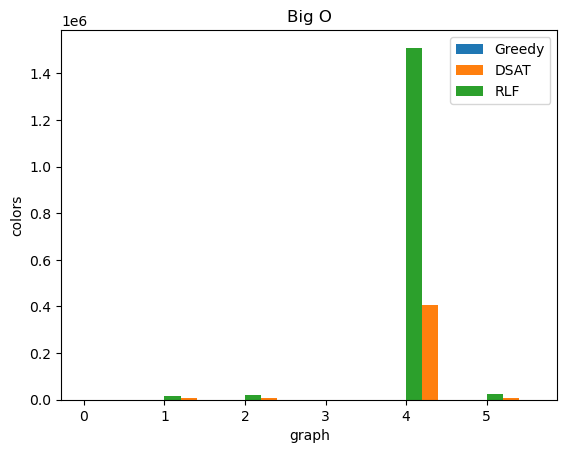

In [19]:
import matplotlib.pyplot as plt


graphs = []
B = nx.algorithms.bipartite.gnmk_random_graph(10, 10, 90)

C = nx.complete_graph(10)

S = nx.star_graph(100, create_using=None)
R1 = (nx.gnm_random_graph(100,100))
R2 = nx.gnm_random_graph(100,300)
L = nx.grid_2d_graph(30,30)

graphs += [B, R1, R2, C, L, S,]

x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O')

i = 0
for bot in graphs:
    y_values_Greedy_rand.append(greedy_color(bot, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    y_values_DSatur.append(DSatur(bot)[1])
    
    print(y_values_Greedy_rand)
    x_values.append (i)
    
    i+=1

    
plt.bar(x_values, y_values_Greedy_rand, width=0.6, bottom=None, align='edge', label="Greedy")
plt.bar(x_values, y_values_DSatur, width=0.4, bottom=None, align ='edge', label="DSAT")
plt.bar(x_values, y_values_RLF, width=0.2, bottom=None, align ='edge', label="RLF")
'''
plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")
'''
leg = plt.legend(loc='best')

plt.show()

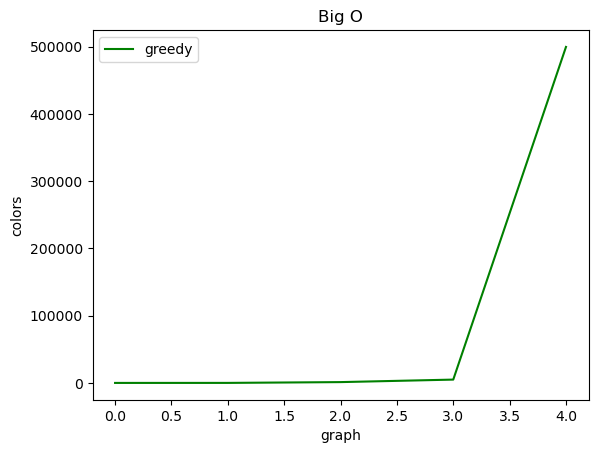

In [20]:
import matplotlib.pyplot as plt


graphs = []

C = (nx.complete_graph(5),"Complete Graph 5")
C1 = (nx.complete_graph(10),"Complete Graph 10")
C2 = (nx.complete_graph(50),"Complete Graph 50")
C3 = (nx.complete_graph(100),"Complete Graph 100")
C4 = (nx.complete_graph(1000),"Complete Graph 1000")

graphs = [C[0], C1[0], C2[0], C3[0], C4[0]]
names = [C[1], C1[1], C2[1], C3[1], C4[1]]

x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O')

i = 0
for bot in graphs:
    
    y_values_Greedy_rand.append(greedy_color(bot, strategy_random_sequential)[1])
    #y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    #y_values_DSatur.append(DSatur(bot)[1])
    
    x_values.append (i)
    
    i+=1

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
#plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
#plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

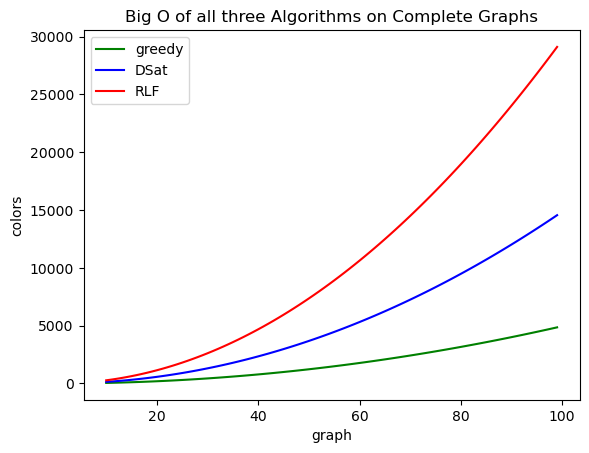

In [21]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.complete_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

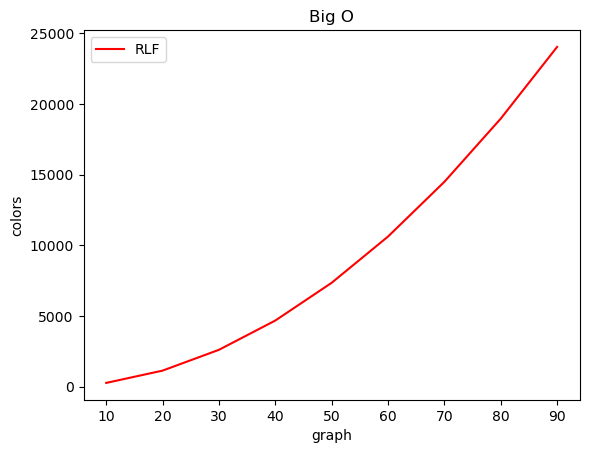

In [22]:
#RLF big O on complete graphs
import matplotlib.pyplot as plt



x_values = []
#y_values_DSatur = []
y_values_RLF = []
#y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O')


for i in range(1,10):
    
    G = nx.complete_graph(i*10)
    
    #y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    #get our 'comparison counts'
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    #y_values_DSatur.append(DSatur(bot)[1])
    
    x_values.append (i*10)
    

#plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
#plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

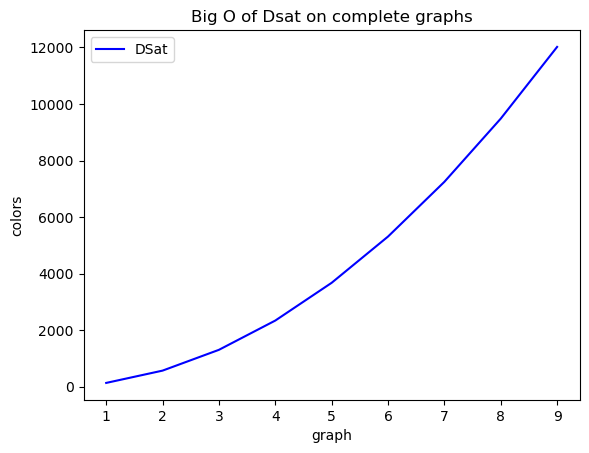

In [23]:
#DSat bigO on complete graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
#y_values_RLF = []
#y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of Dsat on complete graphs')


for i in range(1,10):
    
    G = nx.complete_graph(i*10)
    
    #y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    #y_values_RLF.append(greedy_color(bot, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

#plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
#plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

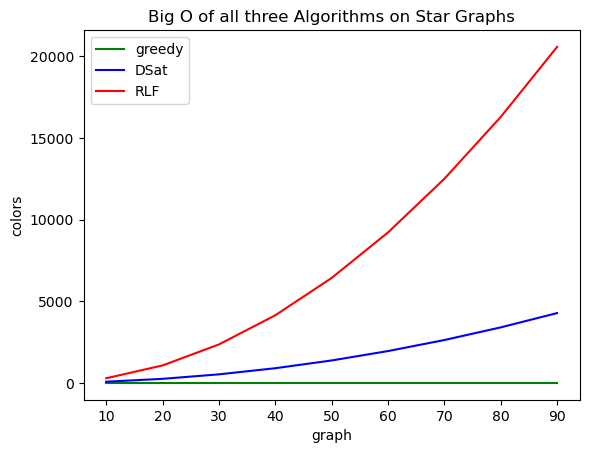

In [25]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Star Graphs')


for i in range(10, 100, 10):
    
    G = nx.star_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

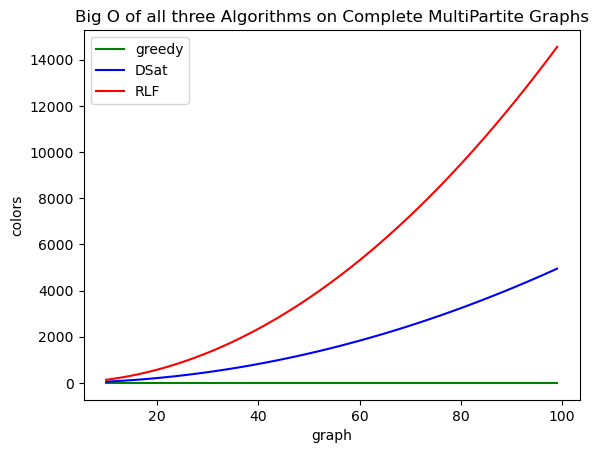

In [26]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete MultiPartite Graphs')


for i in range(10,100):
    
    G = nx.complete_multipartite_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

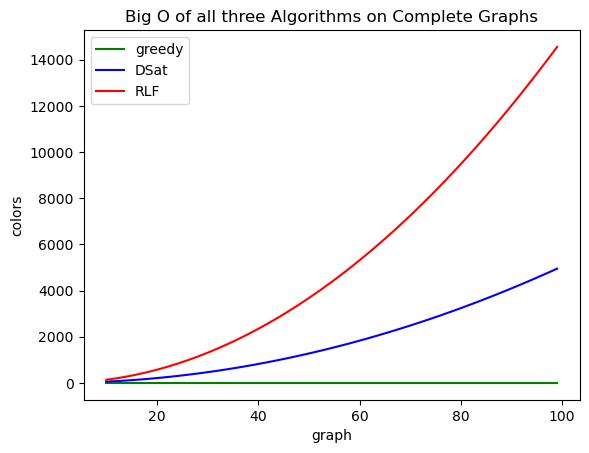

In [27]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.complete_multipartite_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

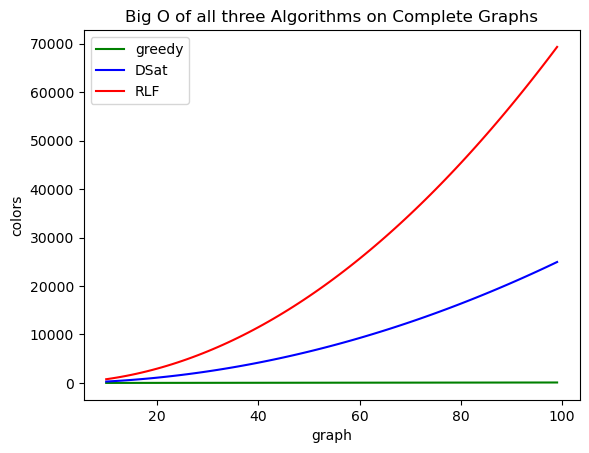

In [28]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.complete_multipartite_graph(i, i+1)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

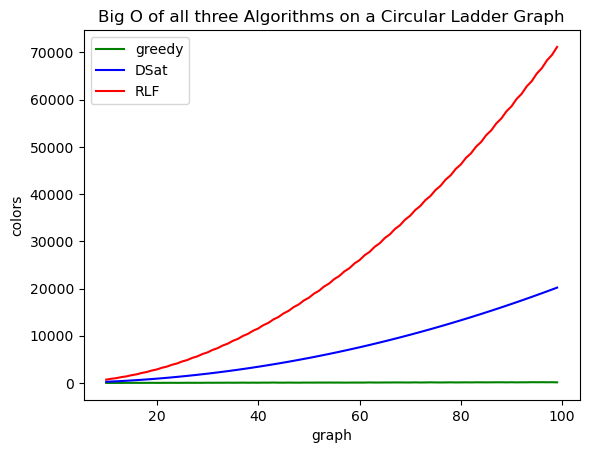

In [29]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on a Circular Ladder Graph')


for i in range(10,100):
    
    G = nx.circular_ladder_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

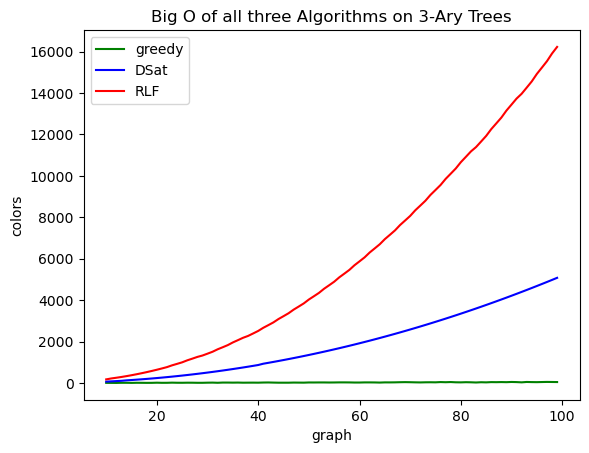

In [30]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on 3-Ary Trees')


for i in range(10,100):
    
    G = nx.full_rary_tree(3,i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

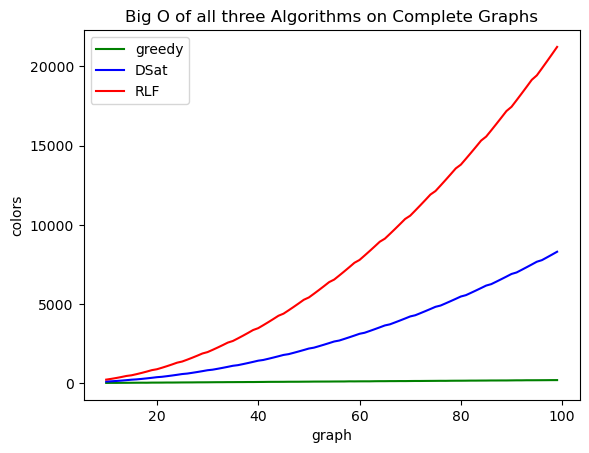

In [31]:
#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.turan_graph(i,5)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

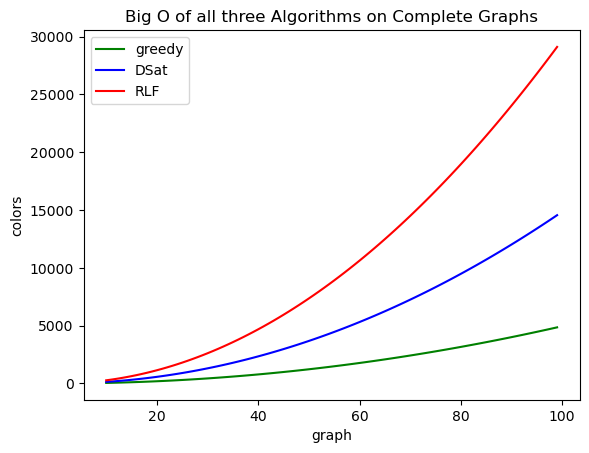

In [32]:


#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.erdos_renyi_graph(i, i // 2)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

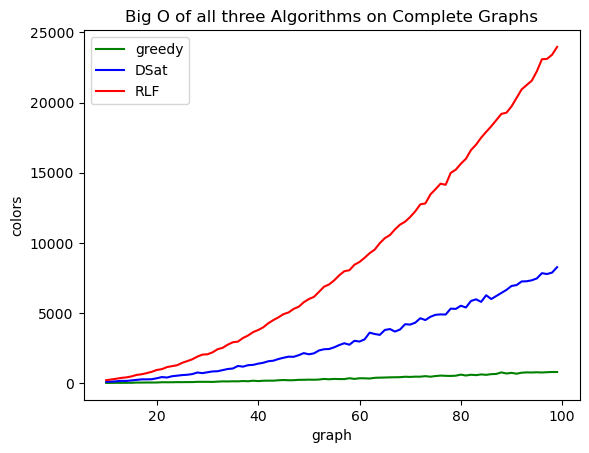

In [33]:


#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.watts_strogatz_graph(i, i // 2, .5)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

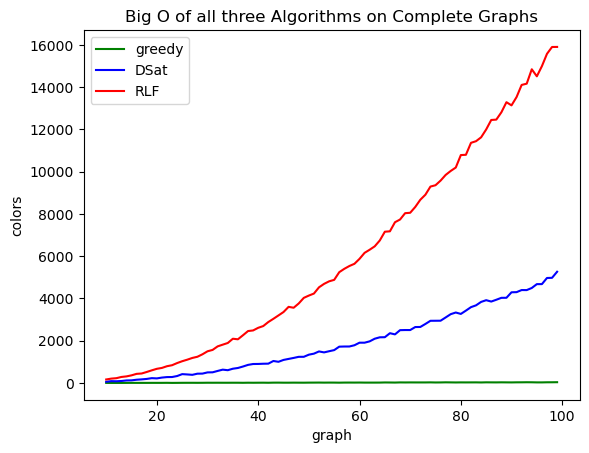

In [34]:

#Big O of Our Algorithms Complete Graphs
import matplotlib.pyplot as plt



x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')


for i in range(10,100):
    
    G = nx.dense_gnm_random_graph(i, i // 2)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

In [1]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('graph')
plt.title('Big O of all three Algorithms on Complete Graphs')



for i in range(10,100):
    
    G = nx.path_graph(i)
    
    y_values_Greedy_rand.append(greedy_color(G, strategy_random_sequential)[1])
    y_values_RLF.append(greedy_color(G, RLFColoring)[1])
    y_values_DSatur.append(DSatur(G)[1])
    
    x_values.append (i)
    

plt.plot(x_values, y_values_Greedy_rand, 'green', label = "greedy")
plt.plot(x_values, y_values_DSatur, 'blue', label = "DSat")
plt.plot(x_values, y_values_RLF, 'red', label = "RLF")

leg = plt.legend(loc='best')

plt.show()

NameError: name 'plt' is not defined

In [114]:
#####Bipartite graph 

graph = nx.Graph()
graph.add_node(0)
graph.add_node(1)
graph.add_node(2)
graph.add_node(3)
graph.add_node(4)
graph.add_node(5)
graph.add_node(6)
graph.add_node(7)
graph.add_node(8)
graph.add_node(9)

In [115]:

graph.add_edge(0,6)
graph.add_edge(0,7)
graph.add_edge(0,8)
graph.add_edge(0,9)

In [116]:
graph.add_edge(1,5)
graph.add_edge(1,7)
graph.add_edge(1,8)
graph.add_edge(1,9)

In [117]:
graph.add_edge(2,5)
graph.add_edge(2,6)
graph.add_edge(2,8)
graph.add_edge(2,9)

In [118]:
graph.add_edge(3,5)
graph.add_edge(3,6)
graph.add_edge(3,7)
graph.add_edge(3,9)

In [119]:
graph.add_edge(4,5)
graph.add_edge(4,6)
graph.add_edge(4,7)
graph.add_edge(4,8)

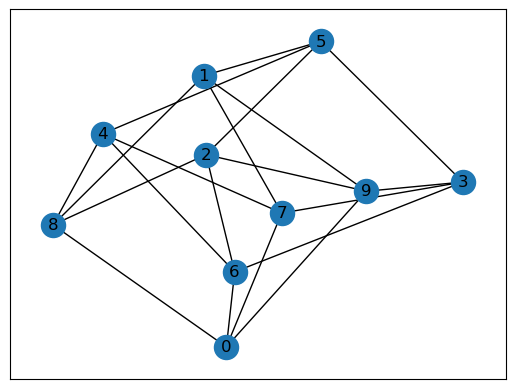

In [120]:
nx.draw_networkx(graph)

In [121]:
colors, count = DSatur(graph)
colorlist = []
for key in colors:
    colorlist.append(colors[key])

In [101]:
print(colors)

{10: 0, 4: 1, 9: 0, 8: 0, 7: 0, 6: 0, 5: 1, 3: 1, 2: 1, 1: 1}


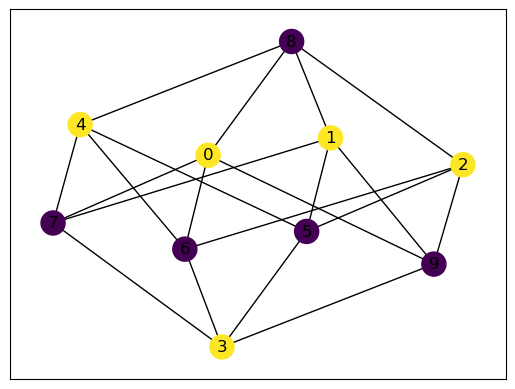

In [122]:
nx.draw_networkx(graph, node_color = [colors[node] for node in graph.nodes()])

In [124]:
def average(lst):
    new_lst = []
    av = sum(lst)/len(lst)
    for i in range(len(lst)):
        new_lst.append(av)
    return av, new_lst

{'h': 0, 'g': 0, 'e': 0, 'f': 0, 'c': 1, 'a': 1, 'b': 1, 'd': 1}


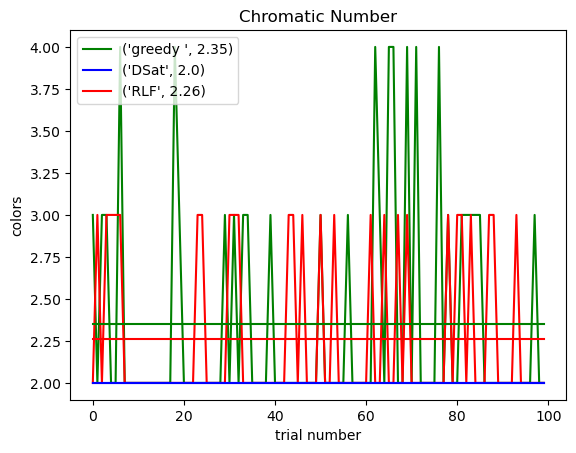

In [126]:
x_values = []
y_values_DSatur = []
y_values_RLF = []
y_values_Greedy_rand = []

plt.ylabel('colors')
plt.xlabel('trial number')
plt.title('Chromatic Number')

#nodes = ['a','e','b','f','c','g','d','h']

#nodes = ['a','c','d','a','e','f','g','h']
#nodes = ['a','b','f','d','e','h','g','c']


for i in range(100):
    lst_nodes = ['a','b','c','d','e','f','g','h']
    
    nodes = random.sample(lst_nodes,len(lst_nodes))
    
    
    bot = nx.Graph()
    bot.add_nodes_from(nodes)

    bot.add_edge('a', 'f')
    bot.add_edge('a', 'g')
    bot.add_edge('a', 'h')
    bot.add_edge('b', 'e')
    bot.add_edge('b', 'g')
    bot.add_edge('b', 'h')
    bot.add_edge('c', 'e')
    bot.add_edge('c', 'f')
    bot.add_edge('c', 'h')
    bot.add_edge('d', 'e')
    bot.add_edge('d', 'f')
    bot.add_edge('d', 'g')
    
    gr = greedy_color(bot, strategy_random_sequential)[0]
    RLF = greedy_color(bot, RLFColoring)[0]
    DSat = DSatur(bot)[0]
    
    
    x_values.append (i)
    y_values_DSatur.append(
        max(list(DSat.values())) +1
    )
    y_values_RLF.append(
        max(list(RLF.values())) +1
    )
    y_values_Greedy_rand.append(
        max(list(gr.values())) +1
    )

    
print(RLF)
plt.plot(x_values, y_values_Greedy_rand, 'green', label = ("greedy ", average(y_values_Greedy_rand)[0]))
plt.plot(x_values, y_values_DSatur, 'blue', label = ("DSat", average(y_values_DSatur)[0]))
plt.plot(x_values, y_values_RLF, 'red', label = ("RLF", average(y_values_RLF)[0]))


plt.plot(x_values, average(y_values_Greedy_rand)[1], 'green')
plt.plot(x_values, average(y_values_DSatur)[1], 'blue')
plt.plot(x_values, average(y_values_RLF)[1], 'red')

leg = plt.legend(loc='best')

plt.show()